# Example indexing generic vector data
Example indexing generic vector data. We will be using overture's poi dataset as an example

In [15]:
import requests
import geopandas as gpd
import pandas as pd
from worldex.utils.filemanager import download_file
from worldex.datasets.dataset import BaseDataset
from pathlib import Path
from datetime import datetime
from h3ronpy.arrow import cells_parse
from h3ronpy.pandas.vector import cells_dataframe_to_geodataframe
import contextily as cx
import json

In [4]:
details = requests.get("https://api.source.coop/repositories/cholmes/overture").json()
details

{'account_id': 'cholmes',
 'repository_id': 'overture',
 'mode': 'listed',
 'data_mode': 'open',
 'featured': 1,
 'meta': {'title': 'Overture Open Buildings',
  'description': "Overture provides several open datasets. This is an experimental re-distribution of their buildings dataset transformed into with 'Cloud-Native Geospatial' formats (PMTiles, GeoParquet).",
  'tags': ['building footprints', 'vector', 'geoparquet', 'pmtiles'],
  'published': '2023-07-28T18:02:15+00:00'},
 'data': {'cdn': 'https://data.source.coop',
  'primary_mirror': 's3-us-west-2',
  'mirrors': {'s3-us-west-2': {'name': 'S3 US-West-2',
    'provider': 's3',
    'uri': 's3://us-west-2.opendata.source.coop/cholmes/overture',
    'region': 'us-west-2',
    'delimiter': '/'}}},
 'disabled': False}

In [5]:
files = requests.get(
    "https://data.source.coop/cholmes/overture/places-geoparquet-country/?limit=500"
).json()
files

{'prefixes': [],
 'objects': [{'name': 'AD.parquet',
   'url': 'https://data.source.coop/cholmes/overture/places-geoparquet-country/AD.parquet',
   'size': 754041},
  {'name': 'AE.parquet',
   'url': 'https://data.source.coop/cholmes/overture/places-geoparquet-country/AE.parquet',
   'size': 21512501},
  {'name': 'AF.parquet',
   'url': 'https://data.source.coop/cholmes/overture/places-geoparquet-country/AF.parquet',
   'size': 2403170},
  {'name': 'AG.parquet',
   'url': 'https://data.source.coop/cholmes/overture/places-geoparquet-country/AG.parquet',
   'size': 373880},
  {'name': 'AI.parquet',
   'url': 'https://data.source.coop/cholmes/overture/places-geoparquet-country/AI.parquet',
   'size': 105199},
  {'name': 'AL.parquet',
   'url': 'https://data.source.coop/cholmes/overture/places-geoparquet-country/AL.parquet',
   'size': 5326710},
  {'name': 'AM.parquet',
   'url': 'https://data.source.coop/cholmes/overture/places-geoparquet-country/AM.parquet',
   'size': 4505898},
  {'name

In [7]:
info = files["objects"][0]
info

{'name': 'AD.parquet',
 'url': 'https://data.source.coop/cholmes/overture/places-geoparquet-country/AD.parquet',
 'size': 754041}

In [11]:
country_code = "ad"
url = info["url"]
name = info["name"]
path = Path(f"../data/source-coop/overture-{country_code}")
path.mkdir(parents=True, exist_ok=True)
download_file(url, path / name)
gdf = gpd.read_parquet(path / name)

In [12]:
gdf

,id,updatetime,version,names,categories,confidence,websites,socials,emails,phones,brand,addresses,sources,bbox,geometry,quadkey,country_iso
0,tmp_E91950EDFCB01FF6E97D2EDB0FD39D6F,2023-07-24T00:00:00.000,0,"{'key_value': [{'key': 'common', 'value': {'li...","{'alternate': {'list': ['ski_resort', 'active_...",0.908235,{'list': ['http://www.vallnord.com/ordino-arca...,{'list': ['https://www.facebook.com/2109728122...,None,None,"{'names': None, 'wikidata': None}","{'list': [{'key_value': [{'key': 'locality', '...","{'list': [{'key_value': [{'key': 'dataset', 'v...","{'maxx': 1.4818957, 'maxy': 42.6318375, 'minx'...",POINT (1.48190 42.63184),120222210220,AD
1,tmp_619BB00B1A5EFB27BB2F4FC3CFB99F2E,2023-07-24T00:00:00.000,0,"{'key_value': [{'key': 'common', 'value': {'li...","{'alternate': None, 'main': 'structure_and_geo...",0.813237,None,{'list': ['https://www.facebook.com/1696848590...,None,None,"{'names': None, 'wikidata': None}",None,"{'list': [{'key_value': [{'key': 'dataset', 'v...","{'maxx': 1.4831, 'maxy': 42.62189, 'minx': 1.4...",POINT (1.48310 42.62189),120222210220,AD
2,tmp_80FC4174D07C4D5C0CAA11C4F4CBF159,2023-07-24T00:00:00.000,0,"{'key_value': [{'key': 'common', 'value': {'li...","{'alternate': {'list': ['coffee_shop', 'ski_re...",0.937793,{'list': ['http://www.vallnord.com']},{'list': ['https://www.facebook.com/5416202262...,None,{'list': ['+376850201']},"{'names': None, 'wikidata': None}","{'list': [{'key_value': [{'key': 'postcode', '...","{'list': [{'key_value': [{'key': 'dataset', 'v...","{'maxx': 1.481804, 'maxy': 42.631917, 'minx': ...",POINT (1.48180 42.63192),120222210220,AD
3,tmp_79E82BBA82C826B39CE9F1B7B27FCF83,2023-07-24T00:00:00.000,0,"{'key_value': [{'key': 'common', 'value': {'li...","{'alternate': None, 'main': 'lake'}",0.781621,None,{'list': ['https://www.facebook.com/1732146093...,None,None,"{'names': None, 'wikidata': None}","{'list': [{'key_value': [{'key': 'postcode', '...","{'list': [{'key_value': [{'key': 'dataset', 'v...","{'maxx': 1.477838, 'maxy': 42.634835, 'minx': ...",POINT (1.47784 42.63484),120222210220,AD
4,tmp_44877D5D438A00910DD26D97F7C70D86,2023-07-24T00:00:00.000,0,"{'key_value': [{'key': 'common', 'value': {'li...","{'alternate': None, 'main': 'ski_resort'}",0.567125,None,{'list': ['https://www.facebook.com/3550433419...,None,None,"{'names': None, 'wikidata': None}","{'list': [{'key_value': [{'key': 'postcode', '...","{'list': [{'key_value': [{'key': 'dataset', 'v...","{'maxx': 1.479335, 'maxy': 42.634382, 'minx': ...",POINT (1.47934 42.63438),120222210220,AD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4109,tmp_362A91A663A07BC2BC8240131BC18280,2023-07-24T00:00:00.000,0,"{'key_value': [{'key': 'common', 'value': {'li...","{'alternate': None, 'main': 'river'}",0.814413,None,{'list': ['https://www.facebook.com/4445243324...,None,None,"{'names': None, 'wikidata': None}","{'list': [{'key_value': [{'key': 'country', 'v...","{'list': [{'key_value': [{'key': 'dataset', 'v...","{'maxx': 1.64275, 'maxy': 42.48545, 'minx': 1....",POINT (1.64275 42.48545),120222212012,AD
4110,tmp_26F35E3094C6B7FF1727A24E000EE1F1,2023-07-24T00:00:00.000,0,"{'key_value': [{'key': 'common', 'value': {'li...","{'alternate': None, 'main': 'river'}",0.715428,None,{'list': ['https://www.facebook.com/1345729028...,None,None,"{'names': None, 'wikidata': None}","{'list': [{'key_value': [{'key': 'country', 'v...","{'list': [{'key_value': [{'key': 'dataset', 'v...","{'maxx': 1.63179, 'maxy': 42.4862, 'minx': 1.6...",POINT (1.63179 42.48620),120222212012,AD
4111,tmp_F1B791CAAA752CF247A9F5E10699A631,2023-07-24T00:00:00.000,0,"{'key_value': [{'key': 'common', 'value': {'li...","{'alternate': None, 'main': 'accommodation'}",0.743302,None,{'list': ['https://www.facebook.com/2849707716...,None,None,"{'names': None, 'wikidata': None}",None,"{'list': [{'key_value': [{'key': 'dataset', 'v...","{'maxx': 1.588647, 'maxy': 42.477606, 'minx': ...",POINT (1.58865 42.47761),120222212012,AD
4112,tmp_8227EB46683

In [19]:
now = datetime.now()
dataset = BaseDataset(
    name=f"Overture Open Buildings {country_code}",
    source_org="Source Coop",
    last_fetched=now,
    description="Overture provides several open datasets. This is an experimental re-distribution of their buildings dataset transformed into with 'Cloud-Native Geospatial' formats (PMTiles, GeoParquet).",
    files=[url],
    projection="EPSG:4326",
    data_format="GeoParquet",
    properties={"url": "https://beta.source.coop/cholmes/overture"},
    keywords=[],
)
dataset.index_from_gdf(gdf, path)

/Users/jtmiclat/.pyenv/versions/3.10.12/envs/worldex/lib/python3.10/site-packages/geopandas/geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)


,h3_index
0,8839623005fffff
1,8839623029fffff
2,883962300dfffff
3,8839623063fffff
4,8839623009fffff
...,...
447,88396221e9fffff
448,88396221d5fffff
449,8839622181fffff
450,8839622115fffff


In [21]:
with open(path / "metadata.json") as f:
    metadata = json.load(f)

metadata

{'name': 'Overture Open Buildings ad',
 'source_org': 'Source Coop',
 'last_fetched': '2023-11-06T13:09:14.647647',
 'files': ['https://data.source.coop/cholmes/overture/places-geoparquet-country/AD.parquet'],
 'description': "Overture provides several open datasets. This is an experimental re-distribution of their buildings dataset transformed into with 'Cloud-Native Geospatial' formats (PMTiles, GeoParquet).",
 'data_format': 'GeoParquet',
 'projection': 'EPSG:4326',
 'properties': {'url': 'https://beta.source.coop/cholmes/overture'},
 'bbox': 'POLYGON ((1.7528100000000000 42.4315599999999975, 1.7528100000000000 42.6527999999999992, 1.4095899999999999 42.6527999999999992, 1.4095899999999999 42.4315599999999975, 1.7528100000000000 42.4315599999999975))',
 'keywords': []}

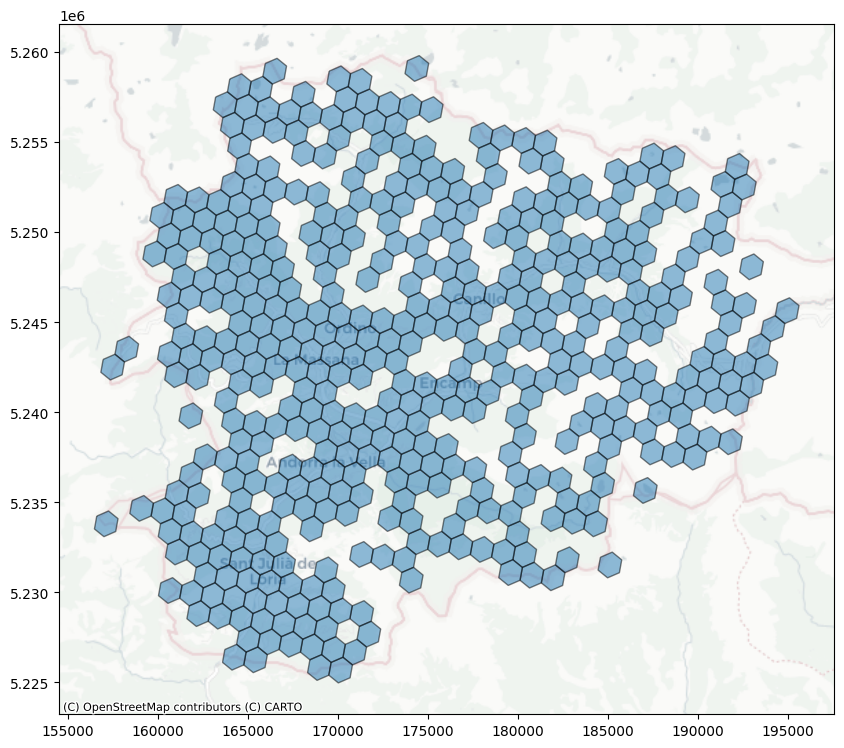

In [16]:
h3 = pd.read_parquet(path / "h3.parquet")

h3_gdf = cells_dataframe_to_geodataframe(
    pd.DataFrame({"cell": cells_parse(h3.h3_index)})
)
h3_gdf_reprojected = h3_gdf.to_crs(epsg=3857)
ax = h3_gdf_reprojected.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)